# Изучение рынка заведений общественного питания Москвы


### Цели и задачи проекта

**Цель** - провести исследовательский анализ заведений общественного питания Москвы для выявления перспективных ниш и форматов заведений.
**Задача** - провести предобработку представленных данных. Проанализировать представленую информацию и зависимости между данными. Поднготовить графики и таблицы для визуального отображения результатов ислледоования. 

### Описание данных

<font color='#777778'>В проекте будут использованы данные двух датасетов `/datasets/rest_info.csv` и `/datasets/rest_price.csv` с такими описаниями:</font>
**/datasets/rest_info.csv**
<font color='#777778'>
- `name` — название заведения;
- `address` — адрес заведения;
- `district` — административный район, в котором находится заведение, например Центральный административный округ;
- `category` — категория заведения, например «кафе», «пиццерия» или «кофейня»;
- `hours` — информация о днях и часах работы;
- `rating` — рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — 5.0);
- `chain` — число, выраженное 0 или 1, которое показывает, является ли заведение сетевым (для маленьких сетей могут встречаться ошибки):
    - 0 — заведение не является сетевым;
    - 1 — заведение является сетевым.
- `seats` — количество посадочных мест.</font>

**/datasets/rest_price.csv**
<font color='#777778'>
- `price` — категория цен в заведении, например «средние», «ниже среднего», «выше среднего» и так далее;
- `avg_bill` — строка, которая хранит среднюю стоимость заказа в виде диапазона, например:
    - «Средний счёт: 1000–1500 ₽»;
    - «Цена чашки капучино: 130–220 ₽»;
    - «Цена бокала пива: 400–600 ₽».
       и так далее;
- `middle_avg_bill` — число с оценкой среднего чека, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Средний счёт»:
    - Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
    - Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
    - Если значения нет или оно не начинается с подстроки «Средний счёт», то в столбец ничего не войдёт.
- `middle_coffee_cup` — число с оценкой одной чашки капучино, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Цена одной чашки капучино»:
    - Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
    - Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
    - Если значения нет или оно не начинается с подстроки «Цена одной чашки капучино», то в столбец ничего не войдёт.</font>

### Содержимое проекта

1. Загрузка данных и знакомство с ними
   - Промежуточный вывод
   - Подготовка единого датафрейма
2.  Предобработка данных
   - Промежуточный вывод
3. Исследовательский анализ данных
   - Исследование распределений заведений по категориям
   - Исследование распределений заведений по административным районам
   - Изучение соотношения сетевых и несетевых заведений
   - Исследование количества посадочных мест заведений
   - Исследование рейтинга заведений
   - Изучении корреляции рейтинга заведений с другими данными
   - Изучение 15 сетей заведений в Москве
   - Изучение вариаций среднего чека заведений
   - Промежуточный вывод
4. Детальное исследование пиццерий
   - Изучение информаци о количестве пиццерий 
   - Изучение характеристик типовой пиццерии 
   - Изучение распределения сетевых и несетевых пиццерий
   - Промежуточный вывод
5. Итоговый вывод и рекомендации
   


## 1. Загрузка данных и знакомство с ними

- Загрузите данные о заведениях общественного питания Москвы. Путь к файлам: `/datasets/rest_info.csv` и `/datasets/rest_price.csv`.

Начнём с загрузки библиотек и датасетов `rest_info` и `rest_price`. Будем использовать pandas и библиотеки визуализации данных matplotlib и seaborn, а также phik для построения матрицы корреляции. Данные датасетов сохраним в двух переменных: `bank_df` и `clients_df`.

In [1]:
#Устанавливаем библиотеку phik
!pip install phik

     ---------------------------------------- 0.0/621.3 kB ? eta -:--:--
     -------------------------------------- 621.3/621.3 kB 4.4 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/41.0 MB ? eta -:--:--
   - -------------------------------------- 1.0/41.0 MB 6.9 MB/s eta 0:00:06
   -- ------------------------------------- 2.6/41.0 MB 6.5 MB/s eta 0:00:06
   --- ------------------------------------ 3.4/41.0 MB 5.8 MB/s eta 0:00:07
   ---- ----------------------------------- 4.7/41.0 MB 5.8 MB/s eta 0:00:07
   ----- ---------------------------------- 6.0/41.0 MB 5.9 MB/s eta 0:00:06
   ------- -------------------------------- 7.3/41.0 MB 5.9 MB


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Импортируем библиотеки
import pandas as pd

# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

# Загружаем библиотеку для расчёта коэффициента корреляции phi_k
from phik import phik_matrix

In [3]:
# Выгружаем данные в переменные info_df и price_df
info_df = pd.read_csv('https://code.s3.yandex.net/datasets/rest_info.csv')
price_df = pd.read_csv('https://code.s3.yandex.net/datasets/rest_price.csv')

In [4]:
# Выводим информацию о датафрейме info_df
info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     7870 non-null   object 
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 591.2+ KB


In [5]:
# Выводим первые строки датафрейма info_df на экран
info_df.head()

,id,name,category,address,district,hours,rating,chain,seats
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0


Датасет `/datasets/rest_info.csv` содержит 9 столбцов и 8406 строк, в которых представлена информация о заведениях общественного питания.
**Типы данных и их корректность:**
- **Строковые данные (object).** Шесть столбцов содержат данные типа `object`: `id`, `name`, `category`, `address`, `district`, `hours`. Во всех столбцах хранятся или строковые данные или строковые в перемешку с числовыми, поэтому данный тип является корректным для представленных столбцов.
- **Числовые значения с плавающей запятой (float64).** Два столбца содержат данные типа `float64`: `rating`, `seats`. В столбце `rating` хранятся числа с дробной часть, поэтому данный тип корретный.  В столбце `seats` хранится число посадочных мест заведениния. это всегда должно быть целое число, поэтому для данного столбца стоит скорректировать тип данных на `int16`.
- **Числовые значения(int64).** Столбец `chain` имет тип данных `int64`. Это корректный тип для данного столбца, но его можно скорректировать на `int8`, так как вариативность значений этого столбца предпологает только два значения 1 и 8. 

В целом для всех столбцов используются корректные типы данных. Для оптимизации можно скорретировать тип дынных столбца `chain` с `int64` на `int8`. Также тип данных столбца `seats`  изменить с `float64` на `int16`.

Также можно отметить что названия столбцов имеют единый формат `snake_case`. Как минимум в одном столбце (`seats`) есть пропуски в данных.

In [6]:
# Выводим информацию о датафрейме price_df
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float64
 4   middle_coffee_cup  535 non-null    float64
dtypes: float64(2), object(3)
memory usage: 158.6+ KB


In [7]:
# Выводим первые строки датафрейма price_df на экран
price_df.head()

,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,045780ada3474c57a2112e505d74b633,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
1,1070b6b59144425896c65889347fcff6,средние,Средний счёт:от 1000 ₽,1000.0,NaN
2,03ac7cd772104f65b58b349dc59f03ee,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
3,a163aada139c4c7f87b0b1c0b466a50f,средние,Средний счёт:400–600 ₽,500.0,NaN
4,8a343546b24e4a499ad96eb7d0797a8a,средние,NaN,NaN,NaN


Датасет `/datasets/rest_price.csv` содержит 5 столбцов и 4058 строк, в которых представлена информация о среднем чеке в заведениях общественного питания.

**Типы данных и их корректность:**
- **Строковые данные (object).** Три столбца содержат тип данных `object`: `id`, `price`, `avg_bill`. В данных столбцах хранятся строковые данные, поэтому типо для столбцов корректный. 
- **Числовые значения с плавающей запятой (float64).** Два столбца содержат данные типа `float64`: `middle_avg_bill`, `middle_coffee_cup`. В данных столбцах хранятся числовые значения с плавающей точкой, поэтому столбцы имеют кореектный тип данных `float64`.

Все столбцы имеют корректный тип данных.

Также можно отметить что названия столбцов имеют единый формат `snake_case`. В столбцах `price`,`avg_bill`, `middle_avg_bill`, `middle_coffee_cup` есть пропуски в данных.

### Подготовка единого датафрейма

Объединим данные двух датасетов в один, с которым и продолжим работу. 

Будем присоеденять `/datasets/rest_price.csv` к `/datasets/rest_info.csv`. Соединять данные будем по `id`, который отражен в обоих датасетах(предварительно проверим являются ли они уникальными для каждой строки). Для обьеденения таблиц выбираем тип присоеденения `left`, чтобы сохранить все строки `/datasets/rest_info.csv`. Перед нами в первую очередь стоит цель исследовать заведения для определения будущего формата нового заведения, поэтому данные датасета `/datasets/rest_info.csv` являются для нас первостепенными, а данные датасета `/datasets/rest_price.csv` являются второстепенными, и не будут для нас информативны если для них не будет отражена информация из `/datasets/rest_info.csv`.

In [8]:
#Проверим являются ли значения столбц id уникальными, сравним количество строк датафрейма с количеством уникальных значений id
display(f"Количество строк датафрейма info_df: {len(info_df)}")
display(f"Количество уникальных значений столбца id: {info_df['id'].nunique()}")

'Количество строк датафрейма info_df: 8406'

'Количество уникальных значений столбца id: 8406'

In [9]:
#Проверим являются ли значения столбц id уникальными, сравним количество строк датафрейма с количеством уникальных значений id
display(f"Количество строк датафрейма price_df: {len(price_df)}")
display(f"Количество уникальных значений столбца id: {price_df['id'].nunique()}")

'Количество строк датафрейма price_df: 4058'

'Количество уникальных значений столбца id: 4058'

Видим, что значения `id` уникальны для каждой строки в обоих датафреймах. Будем использовать `id` для обьеденения датафреймов.

In [10]:
# Соединяем данные в единый датафрейм df
df = info_df.merge(price_df, how='left', on='id')

In [11]:
# Выводим информацию о датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 853.9+ KB


Данные соединены, а информация обо всех заведениях сохранилась.

## 2. Предобработка данных


**Корректировка типов данных**

Ранее мы проверяли типы данных и обозначали необходимы корректировки для их оптимизации. В целом для всех столбцов используются корректные типы данных. Для оптимизации можно скорретировать тип дынных столбца `chain` с `int64` на `int8`. Также тип данных столбца `seats`  можно изменить с `float64` на `int16`, так как число посадочных мест не может иметь дробную часть.

In [12]:
#Оптимизируем целочисленный тип данных столбца chain с int64 на int8
df['chain'] = df['chain'].astype('int8')

Cкорретировали тип дынных столбца `chain` с `int64` на `int8`.

In [13]:
# Выводим информацию о датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int8   
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int8(1), object(8)
memory usage: 796.4+ KB


**Наличие пропусков в данных**

- Изучите пропущенные значения в данных: посчитайте их количество в каждом столбце датафрейме, изучите данные с пропущенными значениями и предположите гипотезы их появления. Проведите обработку пропущенных значений: вы можете заменить пропуски на определённое значение, удалить строки с пропусками или оставить их как есть.

Узнаем абсолютное и относительное количество пропусков в столбцах датафрейма.

In [14]:
# Выводим количество пропущенных строк в столбцах датафрейма в абсолютных значениях
df.isna().sum()

id                      0
name                    0
category                0
address                 0
district                0
hours                 536
rating                  0
chain                   0
seats                3611
price                5091
avg_bill             4590
middle_avg_bill      5257
middle_coffee_cup    7871
dtype: int64

In [15]:
# Подсчитываем процент пропусков в каждом столбце 
df.isna().sum() / len(df) * 100

id                    0.000000
name                  0.000000
category              0.000000
address               0.000000
district              0.000000
hours                 6.376398
rating                0.000000
chain                 0.000000
seats                42.957411
price                60.563883
avg_bill             54.603854
middle_avg_bill      62.538663
middle_coffee_cup    93.635498
dtype: float64

Пропуски встречаются в 6 столбцах датафрейма. Во всех столбцах процент пропусков слишком большой чтобы удалять эти данные. Распределение пропусков следующее:
- `hours` (536 пропусков - это 6,3%) - данные могут отсутствовать по причине закрытия заведения или по причине того, что когда информация добавлялась в карты заведение еще небыло открыто и часы работы были неопределены.
- `seats` (3611 пропусков - это 42,9%) 
- `price` (5091 пропусков - это 60,5%) 
- `avg_bill` (4590 пропусков - это 54,6%) 
- `middle_avg_bill` (5257 пропусков - это 62,5%) 
- `middle_coffee_cup` (7871 пропусков - это 93,6%) 

Причиной такого большого количества пропусков во всех столбцах может быть то, что данные взяты из сервисов Яндекс Карты и Яндекс Бизнес. Информация, размещённая в сервисе Яндекс Бизнес, могла быть добавлена пользователями или найдена в общедоступных источниках. Она носит исключительно справочный характер.

Не будем удалять или как-то корректировать эти данные, пока оставим как етсь.

**Явные и неявные дубликаты в данных**

- Проверьте данные на явные и неявные дубликаты, например поля с названием и адресом заведения. Для оптимизации проверки нормализуйте данные в текстовых столбцах, например с названием заведения.

Приведем значения столбцов `name` и `address` к нижнему регистру. Проверим все уникальные значения других столбцов.

In [16]:
#Приведем значения столбца name к нижнему регистру
df['name'] = df['name'].str.lower()

In [17]:
#Приведем все значения столбца address к нижнему регистру
df['address'] = df['address'].str.lower()

In [18]:
#Выводим строки для проверки результата изменений
df[['name', 'address']]

,name,address
0,wowфли,"москва, улица дыбенко, 7/1"
1,четыре комнаты,"москва, улица дыбенко, 36, корп. 1"
2,хазри,"москва, клязьминская улица, 15"
3,dormouse coffee shop,"москва, улица маршала федоренко, 12"
4,иль марко,"москва, правобережная улица, 1б"
...,...,...
8401,суши мания,"москва, профсоюзная улица, 56"
8402,миславнес,"москва, пролетарский проспект, 19, корп. 1"
8403,самовар,"москва, люблинская улица, 112а, стр. 1"
8404,чайхана sabr,"москва, люблинская улица, 112а, стр. 1"


In [19]:
#Выводим все уникальные значения толбца district
df['district'].unique()

array(['Северный административный округ',
       'Северо-Восточный административный округ',
       'Северо-Западный административный округ',
       'Западный административный округ',
       'Центральный административный округ',
       'Восточный административный округ',
       'Юго-Восточный административный округ',
       'Южный административный округ',
       'Юго-Западный административный округ'], dtype=object)

Названия районов записаны в одном формате, дубликатов нет. Названия слишком длинные, заменим словосочитание `административный округ` на более короткое `АО` для дальнейшего корректного отображения на графиках.

In [20]:
#Делвем замену словосочитания `административный округ` на более короткое `АО`
df['district'] = df['district'].str.replace('административный округ', 'АО')
df['district'].unique()

array(['Северный АО', 'Северо-Восточный АО', 'Северо-Западный АО',
       'Западный АО', 'Центральный АО', 'Восточный АО',
       'Юго-Восточный АО', 'Южный АО', 'Юго-Западный АО'], dtype=object)

In [21]:
#Выводим все уникальные значения толбца category
df['category'].unique()

array(['кафе', 'ресторан', 'кофейня', 'пиццерия', 'бар,паб',
       'быстрое питание', 'булочная', 'столовая'], dtype=object)

Названия категорий записаны в одном формате, дубликатов нет.

In [22]:
#Проверяем наличие явных дубликатов в данных 
df.duplicated().sum() 

np.int64(0)

Как видим, явных дубликатов в данных нет. Но проверим еще на неявные дубликаты. Неявными будут являтся дубликаты где совпадают в строках названия, адреса и категории заведения.

In [23]:
# Ищем неявные дубликаты по названию и адресу заведения
df.loc[(df[['name','address', 'category']].duplicated(keep=False))] 

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
189,072032ce16dc47bfbc63b672c75bd371,кафе,кафе,"москва, парк ангарские пруды",Северный АО,"ежедневно, 09:00–23:00",3.2,0,NaN,NaN,NaN,NaN,NaN
215,897ddbc6746c4388b19dc8a9fcdbb488,кафе,кафе,"москва, парк ангарские пруды",Северный АО,"ежедневно, 10:00–22:00",3.2,0,NaN,NaN,NaN,NaN,NaN
1430,62608690e9cc464fbcd980cfd552e334,more poke,ресторан,"москва, волоколамское шоссе, 11, стр. 2",Северный АО,"ежедневно, 09:00–21:00",4.2,0,188.0,NaN,NaN,NaN,NaN
1511,a69f018d5c064873a3b491b0121bc1b4,more poke,ресторан,"москва, волоколамское шоссе, 11, стр. 2",Северный АО,"пн-чт 09:00–18:00; пт,сб 09:00–21:00; вс 09:00...",4.2,1,188.0,NaN,NaN,NaN,NaN


Видим, что в данных есть 2 дублирующиеся строчки.

In [24]:
#Удаляем неявные дубликаты 
df = df.drop_duplicates(subset=['name','address', 'category'])

In [25]:
#Проверяем произошло ли удаление дубликатов 
df.loc[(df[['name','address', 'category']].duplicated(keep=False))] 

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup


Все дубликаты из датафрейма `df` удалены.

**Выделим заведения, которые рабатают 24/7**

- Для дальнейшей работы создайте столбец `is_24_7` с обозначением того, что заведение работает ежедневно и круглосуточно, то есть 24/7:
  - логическое значение `True` — если заведение работает ежедневно и круглосуточно;
  - логическое значение `False` — в противоположном случае.

Заведения, которые работают ежедневно и круглосуточно в столбце `hours` имеют запись ` ежедневно, круглосуточно`. Будем проверять наличие данной записи в столбце. Перед примеением метода предварительно заменим пустые значения столбца hours на 'нет данных'

In [26]:
#Заменяем пустые значения столбца hours на 'нет данных'
df['hours'] = df['hours'].fillna('нет данных') 

In [27]:
strc = []
not_found = -1
for i in range(df.shape[0]):
    if (df.iloc[i, 5].find('ежедневно, круглосуточно') != not_found):
        strc.append(1)
    else:
        strc.append(0)

In [28]:
df['is_24_7'] = strc

In [29]:
df.head(30)

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup,is_24_7
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,wowфли,кафе,"москва, улица дыбенко, 7/1",Северный АО,"ежедневно, 10:00–22:00",5.0,0,NaN,NaN,NaN,NaN,NaN,0
1,045780ada3474c57a2112e505d74b633,четыре комнаты,ресторан,"москва, улица дыбенко, 36, корп. 1",Северный АО,"ежедневно, 10:00–22:00",4.5,0,4.0,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN,0
2,1070b6b59144425896c65889347fcff6,хазри,кафе,"москва, клязьминская улица, 15",Северный АО,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0,средние,Средний счёт:от 1000 ₽,1000.0,NaN,0
3,03ac7cd772104f65b58b349dc59f03ee,dormouse coffee shop,кофейня,"москва, улица маршала федоренко, 12",Северный АО,"ежедневно, 09:00–22:00",5.0,0,NaN,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0,0
4,a163aada139c4c7f87b0b1c0b466a50f,иль марко,пиццерия,"москва, правобережная улица, 1б",Северный АО,"ежедневно, 10:00–22:00",5.0,1,148.0,средние,Средний счёт:400–600 ₽,500.0,NaN,0
5,8a343546b24e4a499ad96eb7d0797a8a,sergio pizza,пиццерия,"москва, ижорская улица, вл8б",Северный АО,"ежедневно, 10:00–23:00",4.6,0,NaN,средние,NaN,NaN,NaN,0
6,96ebceb1a09e4e3191133b9fe0379a64,огни города,"бар,паб","москва, клязьминская улица, 9, стр. 3",Северный АО,пн 15:00–04:00; вт-вс 15:00–05:00,4.4,0,45.0,средние,Средний счёт:199 ₽,199.0,NaN,0
7,0243288b78024af090b8e947842c969c,mr. уголёк,быстрое питание,"москва, клязьминская улица, 9, стр. 3",Северный АО,"пн-чт 10:00–22:00; пт,сб 10:00–23:00; вс 10:00...",4.7,0,45.0,средние,Средний счёт:200–300 ₽,250.0,NaN,0
8,36aeb0ffa69c48fdb0021549520deb10,donna maria,ресторан,"москва, дмитровское шоссе, 107, корп. 4",Северный АО,"ежедневно, 10:00–22:00",4.8,0,79.0,средние,Средний счёт:от 500 ₽,500.0,NaN,0
9,487167877eb04288bc90d4fa80646fc2,готика,кафе,"москва, ангарская улица, 39",Северный АО,"ежедневно, 12:00–00:00",4.3,0,65.0,средние,Средний счёт:1000–1200 ₽,1100.0,NaN,0


Дополнили датафрейм новым столбцом `is_24_7`, с обозначением того, что заведение работает ежедневно и круглосуточно:
    1 - работает ежедневно и круглосуточно
    0 - противоположый случай.
   

---

### Промежуточный вывод

После предобработки данных напишите промежуточный вывод о проведённой работе. Отразите количество или долю отфильтрованных данных, если вы что-то удаляли.

В ходе предобработки данных были выполнены следующие действия:
1. Объединили данные двух датасетов в один, по `id`.
2. Cкорретировали тип дынных столбца `chain` с `int64` на `int8`.
3. Привели значения столбцов `name` и `address` к нижне регистру.
4. Удалили 2 сроки неявных дубликатов по 3-м столбцам `name`,`address`, `category`. 
5. Заменили пустые значения столбца `hours` на `нет данных`.
6. Дополнили датафрейм новым столбцом is_24_7, с обозначением того, что заведение работает ежедневно и круглосуточно: 1 - работает ежедневно и круглосуточно, 0 - другой график работы.


## 3. Исследовательский анализ данных
Проведите исследовательский анализ исходных данных.

При исследовании данных используйте визуализации. Проверьте, что для каждого случая подобран оптимальный тип визуализации с корректным оформлением. У графика должен быть заголовок, понятные подписи по осям, при необходимости легенда, а его размер является оптимальным для изучения.

После исследования каждого пункта оставляйте небольшой комментарий с выводом или обсуждением результата. В конце шага обобщите результаты, выделив, по вашему мнению, самые важные.

---

### Задача 1

Какие категории заведений представлены в данных? Исследуйте количество объектов общественного питания по каждой категории. Результат сопроводите подходящей визуализацией.

In [30]:
# Проверяем распределение данных по значениям столбца category
print('Распределение данных по значениям столбца category:')
df['category'].value_counts(normalize=True)

Распределение данных по значениям столбца category:


category
кафе               0.282842
ресторан           0.242980
кофейня            0.168134
бар,паб            0.091028
пиццерия           0.075321
быстрое питание    0.071752
столовая           0.037482
булочная           0.030462
Name: proportion, dtype: float64

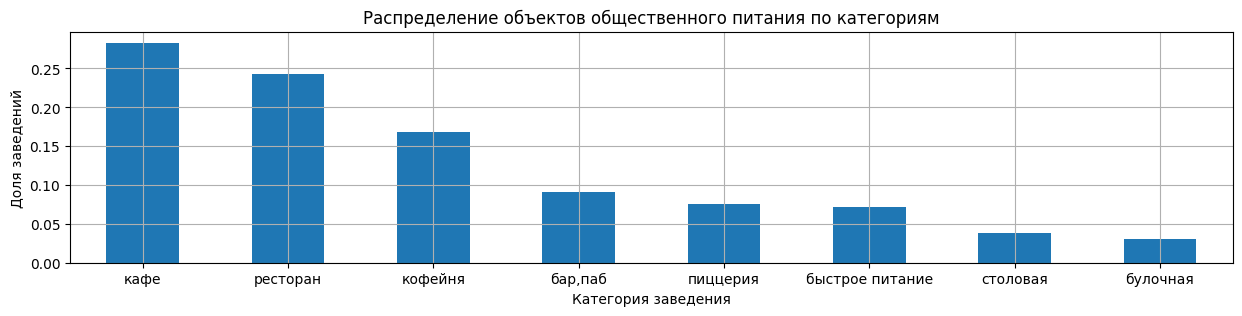

In [31]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(15, 3))

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
df['category'].value_counts(normalize=True).plot(
               kind='bar', # Тип графика - столбчатая диаграмма
               rot=0, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Распределение объектов общественного питания по категориям'
)

# Настраиваем оформление графика
plt.xlabel('Категория заведения')
plt.ylabel('Доля заведений')

# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

В данных представлены 8 категорий заведений. Больше всего заведений представлено категориями `кафе` - (28%), `ресторан` - (24%), `кофейня` - (16%). Меньше всего заведений в категорях `столовая`(3.7%) и `булочная`(3%). 

---

### Задача 2

Какие административные районы Москвы присутствуют в данных? Исследуйте распределение количества заведений по административным районам Москвы, а также отдельно распределение заведений каждой категории в Центральном административном округе Москвы. Результат сопроводите подходящими визуализациями.

In [32]:
# Проверяем распределение данных по значениям столбца district
print('Распределение данных по значениям столбца district:')
df['district'].value_counts(normalize=True)

Распределение данных по значениям столбца district:


district
Центральный АО         0.266778
Северный АО            0.106854
Южный АО               0.106140
Северо-Восточный АО    0.106021
Западный АО            0.101261
Восточный АО           0.094955
Юго-Восточный АО       0.084960
Юго-Западный АО        0.084365
Северо-Западный АО     0.048667
Name: proportion, dtype: float64

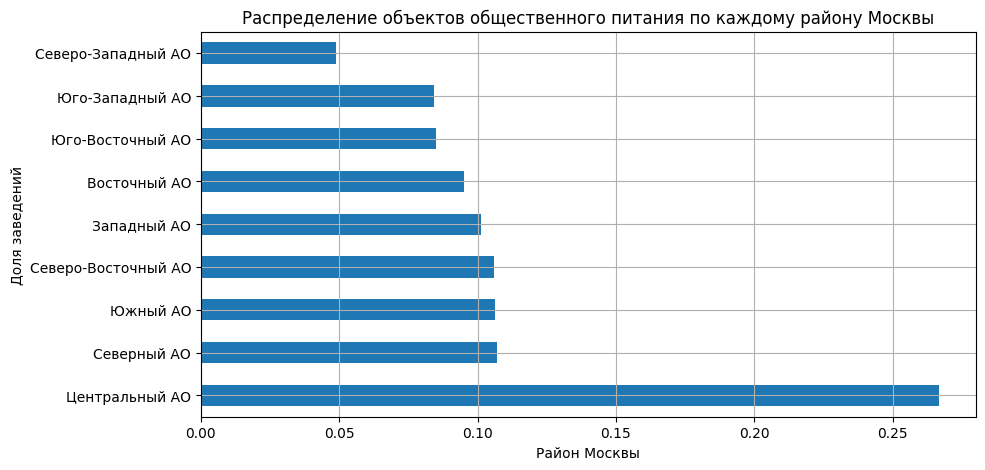

In [33]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(10, 5))

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
df['district'].value_counts(normalize=True).plot(
               kind='barh', # Тип графика - столбчатая диаграмма
               rot=0, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Распределение объектов общественного питания по каждому району Москвы'
)

# Настраиваем оформление графика
plt.xlabel('Район Москвы')
plt.ylabel('Доля заведений')

# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

Больше всего заведений находится в `Центральном районе (26%)` это почти в 2,5 раза больше чем в любом другом районе. меньше всего заведений находтся в `Северо-западном раойне (4%)`. Остальные заведения практически равномерно распределились между оставшимися раонами в пределах 8-10% в каждом.

In [34]:
#Отфильтровываем данные по центральному району в отдельный датафрейм
df_central_district = df[df['district'] == 'Центральный АО']

In [35]:
# Проверяем распределение данных по значениям столбца category для центрального района Москвы
print('Распределение данных по значениям столбца category для центрального района Москвы:')
df['category'].value_counts(normalize=True)

Распределение данных по значениям столбца category для центрального района Москвы:


category
кафе               0.282842
ресторан           0.242980
кофейня            0.168134
бар,паб            0.091028
пиццерия           0.075321
быстрое питание    0.071752
столовая           0.037482
булочная           0.030462
Name: proportion, dtype: float64

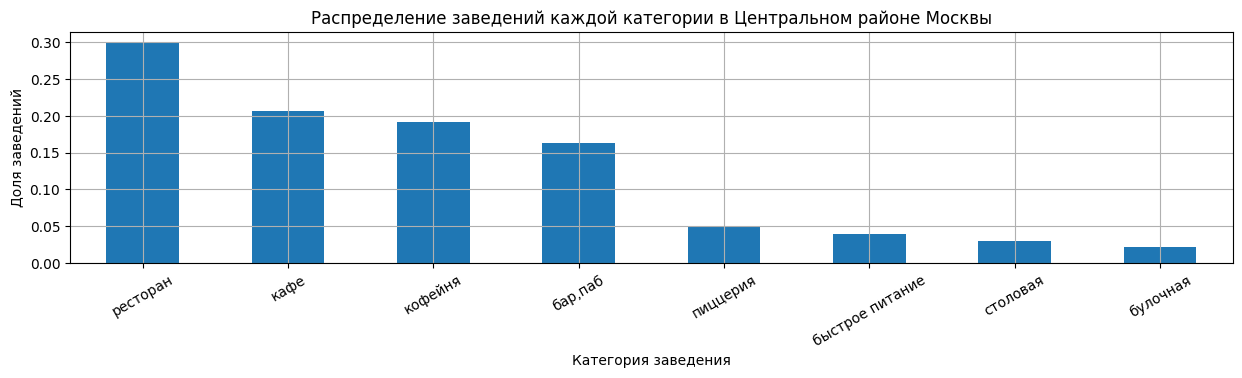

In [36]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(15, 3))

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
df_central_district['category'].value_counts(normalize=True).plot(
               kind='bar', # Тип графика - столбчатая диаграмма
               rot=30, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Распределение заведений каждой категории в Центральном районе Москвы'
)

# Настраиваем оформление графика
plt.xlabel('Категория заведения')
plt.ylabel('Доля заведений')

# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

Из графика видно, что в центральном районе Москвы преобладают 4 категории заведений: `ресторан`, `кафе`, `кофейня`, `бар,паб`. Причем больше всего именно ресторанов - 28%. Меньше всего заведений в категориях `пиццерия`и `быстрое питание` по 7 % в каждой категории., `столовая` и `булочная` по 3% в каждой категории.

---

### Задача 3

Изучите соотношение сетевых и несетевых заведений в целом по всем данным и в разрезе категорий заведения. Каких заведений больше — сетевых или несетевых? Какие категории заведений чаще являются сетевыми? Исследуйте данные, ответьте на вопросы и постройте необходимые визуализации.

In [37]:
# Проверяем распределение заведений между сетевыми и несетевыми
print('Распределение заведений между сетевыми и несетевыми:')
df['chain'].value_counts(normalize=True)

Распределение заведений между сетевыми и несетевыми:


chain
0    0.618753
1    0.381247
Name: proportion, dtype: float64

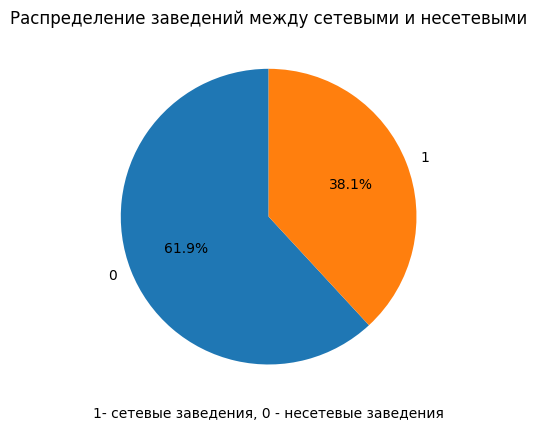

In [38]:
# Строим круговую диаграмму 
df['chain'].value_counts(normalize=True).plot(
    kind='pie', 
    autopct='%1.1f%%',
    startangle=90, 
    legend=False, 
    title='Распределение заведений между сетевыми и несетевыми'
)
# Настроим оформление
plt.ylabel('')
plt.xlabel('1- сетевые заведения, 0 - несетевые заведения')

# Выводим график
plt.show()

62% заведений являются несетевыми, а 38% сетевыми.

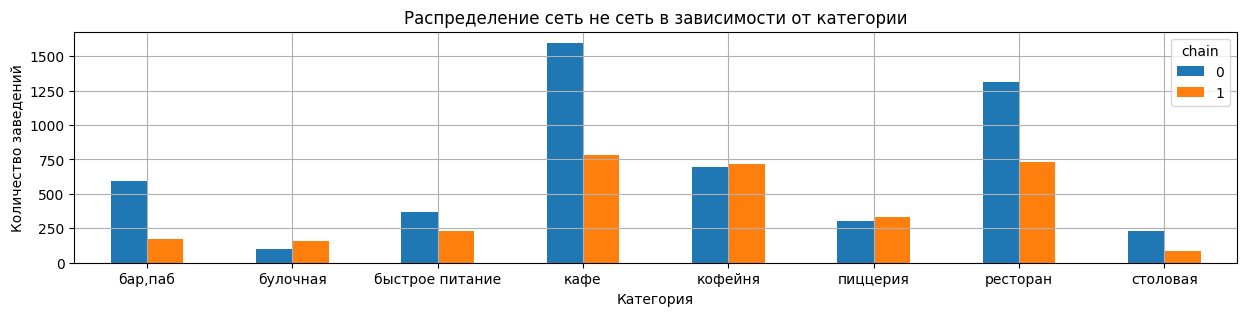

In [39]:
# Построим график столбчатой диаграммы
grouped = df.groupby('category')['chain'].value_counts().unstack()
grouped.plot(kind='bar',
               title=f'Распределение сеть не сеть в зависимости от категории',
               legend=True,
               ylabel='Количество заведений',
               xlabel='Категория',
               rot=0,
               figsize=(15, 3))
plt.grid()

# Выводим график
plt.show()

In [40]:
#Подсчитываем количество все заведений в каждом районе 
grouped_df = df.groupby('category')['name'].count().sort_values(ascending=False)
grouped_df

category
кафе               2377
ресторан           2042
кофейня            1413
бар,паб             765
пиццерия            633
быстрое питание     603
столовая            315
булочная            256
Name: name, dtype: int64

In [41]:
#Подсчитываем количество сетевых заведений в каждом районе 
df_all_chain = df[df['chain'] == True].copy()
grouped_all_chain = df_all_chain.groupby('category')['name'].count().sort_values(ascending=False)
grouped_all_chain

category
кафе               779
ресторан           729
кофейня            720
пиццерия           330
быстрое питание    232
бар,паб            169
булочная           157
столовая            88
Name: name, dtype: int64

In [42]:
#Подсчитываем процент сетевых пиццерий в каждом районе от всего каличества пиццерий в данном районе 
result = (grouped_all_chain / grouped_df) * 100
result = result.sort_values(ascending=False).round(2)
result

category
булочная           61.33
пиццерия           52.13
кофейня            50.96
быстрое питание    38.47
ресторан           35.70
кафе               32.77
столовая           27.94
бар,паб            22.09
Name: name, dtype: float64

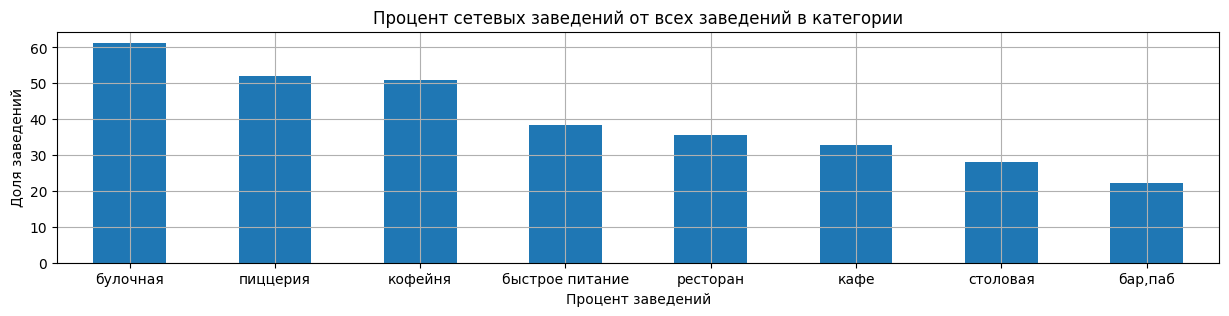

In [43]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(15, 3))

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
result.plot(
               kind='bar', # Тип графика - столбчатая диаграмма
               rot=0, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Процент сетевых заведений от всех заведений в категории'
)

# Настраиваем оформление графика
plt.xlabel('Процент заведений')
plt.ylabel('Доля заведений')

# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

Видим, что большего всего сетевых заведений среди таких категорий как `булочная`, `пиццерия`,`кофейня`. Меньше всего среди `бар,паб`, `столовая`, `кафе`.

---

### Задача 4

Исследуйте количество посадочных мест в заведениях. Встречаются ли в данных аномальные значения или выбросы? Если да, то с чем они могут быть связаны? Приведите для каждой категории заведений наиболее типичное для него количество посадочных мест. Результат сопроводите подходящими визуализациями.


Отфильтруем только те заведения, для которых указано число посадочных мест 

In [44]:
df_seats = df[df['seats'].notna()]

In [45]:
#считаем количество строк получившегося датасета
df_seats.shape[0]

4794

In [46]:
# Изучаем статистические показатели столбца seats
print('Статистические показатели столбца seats:')
df_seats['seats'].describe()

Статистические показатели столбца seats:


count    4794.000000
mean      108.405090
std       122.840831
min         0.000000
25%        40.000000
50%        75.000000
75%       140.000000
max      1288.000000
Name: seats, dtype: float64

Отметим что значения распределяются не совсем равномерно. Высокий показатель стандратного отклонения, что говорит о широком разбросе данных. Минимальное значение равное 0, может обьясняться тем, что некоторые заведения работаю навынос и в них нет посадочных мест. А максимально значение в 1288 обьясняется наличием больших торжественных залов. 

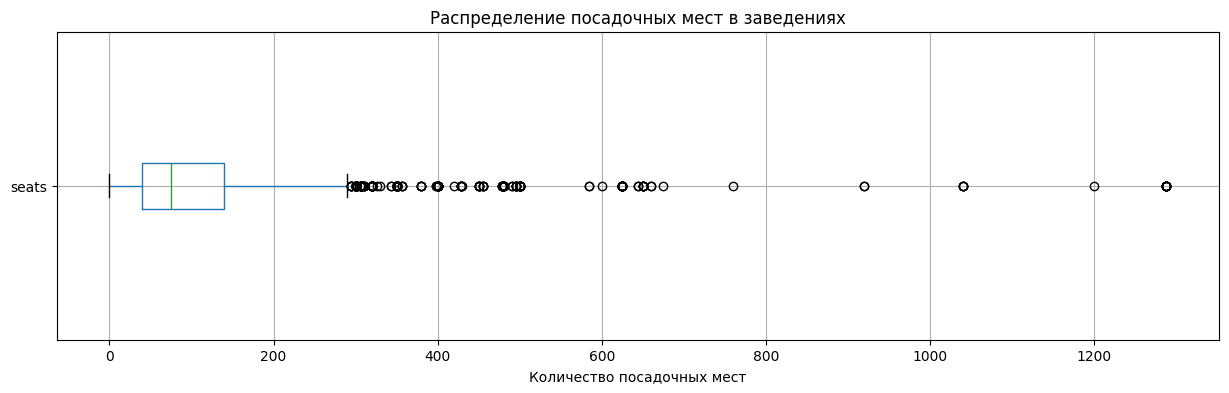

In [47]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(15, 4))

# Строим диаграмму размаха значений в столбце seats
df_seats.boxplot(column='seats', vert=False)

# Добавляем заголовок и метки оси
plt.title('Распределение посадочных мест в заведениях')
plt.xlabel('Количество посадочных мест')

# Выводим график
plt.show()

Распределение данных характеризуется широким разбросом и «хвостом» в правой части гистограммы. Выбросы начинаются после 300 мест. Есть относильно большие значения, однако они вполне могут быть реальны, так как некоторые заведения могут иметь больши банкетные залы.

 Подсчитаем для каждой категории заведений наиболее типичное для него количество посадочных мест. Для визуализаций будем использоват медианное значение, так как из-за наличия больших залов, где более 1000 мест, среднее значение показателя будет завышено. 

In [48]:
#Грпупируем данные по категориям и выводим медианное значение почадочных мест
df.groupby('category')['seats'].median()

category
бар,паб            82.5
булочная           50.0
быстрое питание    65.0
кафе               60.0
кофейня            80.0
пиццерия           55.0
ресторан           86.0
столовая           75.5
Name: seats, dtype: float64

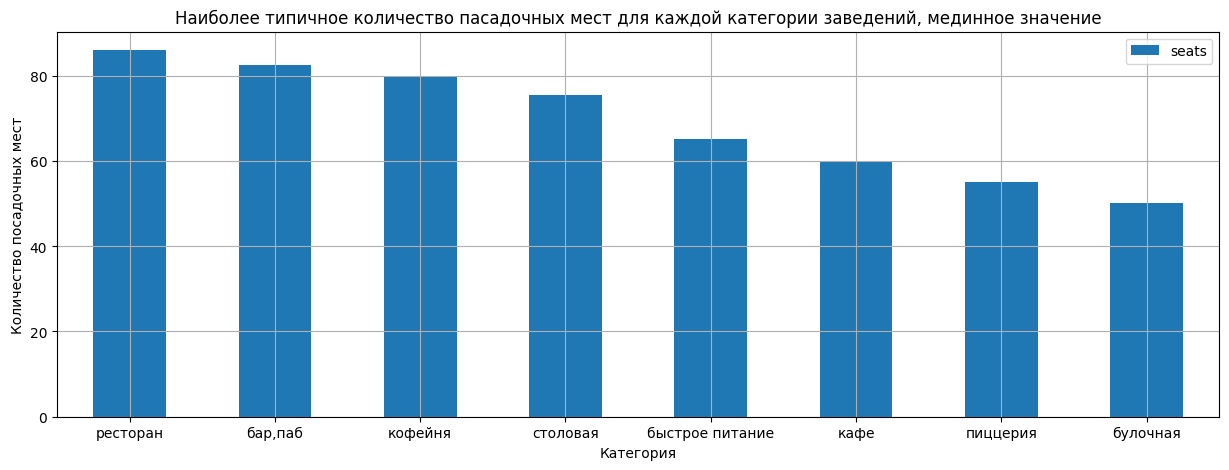

In [49]:
# Построим график столбчатой диаграммы
grouped = df.groupby('category')['seats'].median().sort_values(ascending=False)

grouped.plot(kind='bar',
               title=f'Наиболее типичное количество пасадочных мест для каждой категории заведений, мединное значение',
               legend=True,
               ylabel='Количество посадочных мест',
               xlabel='Категория',
               rot=0,
               figsize=(15, 5))
plt.grid()

# Выводим график
plt.show()

В целом распределение посадочных мест по категориям выглядит равномерным. Рестораны, бары/пабы и кофейни имеею самы высокий показатель по медиане посадочных мест - 80 мест. 

---

### Задача 5

Исследуйте рейтинг заведений. Визуализируйте распределение средних рейтингов по категориям заведений. Сильно ли различаются усреднённые рейтинги для разных типов общепита?

In [50]:
# Изучаем статистические показатели столбца rating
df['rating'].describe()

count    8404.000000
mean        4.230021
std         0.470270
min         1.000000
25%         4.100000
50%         4.300000
75%         4.400000
max         5.000000
Name: rating, dtype: float64

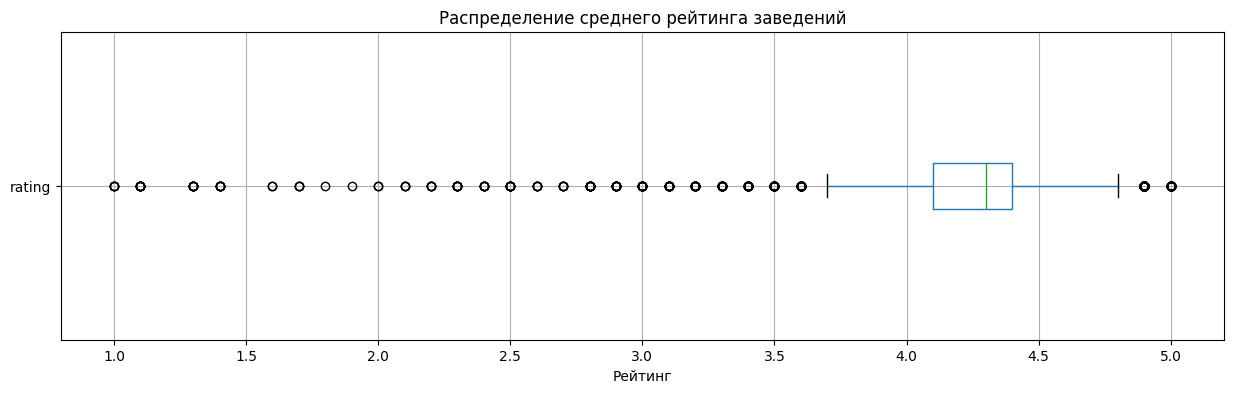

In [51]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(15, 4))

# Строим диаграмму размаха значений в столбце rating
df_seats.boxplot(column='rating', vert=False)

# Добавляем заголовок и метки оси
plt.title('Распределение среднего рейтинга заведений')
plt.xlabel('Рейтинг')

# Выводим график
plt.show()

По данным видим, чтозначения рейтинга распределеляются равномерно, все значения входят в диапазон. Праактически все значения сконцентрированы между 4.1-4.4 это высокие оценки. Есть небольшое количество рейтингов ниже 3,5 что является нормой.   

Проанализируем распределение средних рейтингов по категориям заведений.

In [52]:
grouped = df.groupby('category')['rating'].mean()
grouped

category
бар,паб            4.387712
булочная           4.268359
быстрое питание    4.050249
кафе               4.124274
кофейня            4.277282
пиццерия           4.301264
ресторан           4.290402
столовая           4.211429
Name: rating, dtype: float64

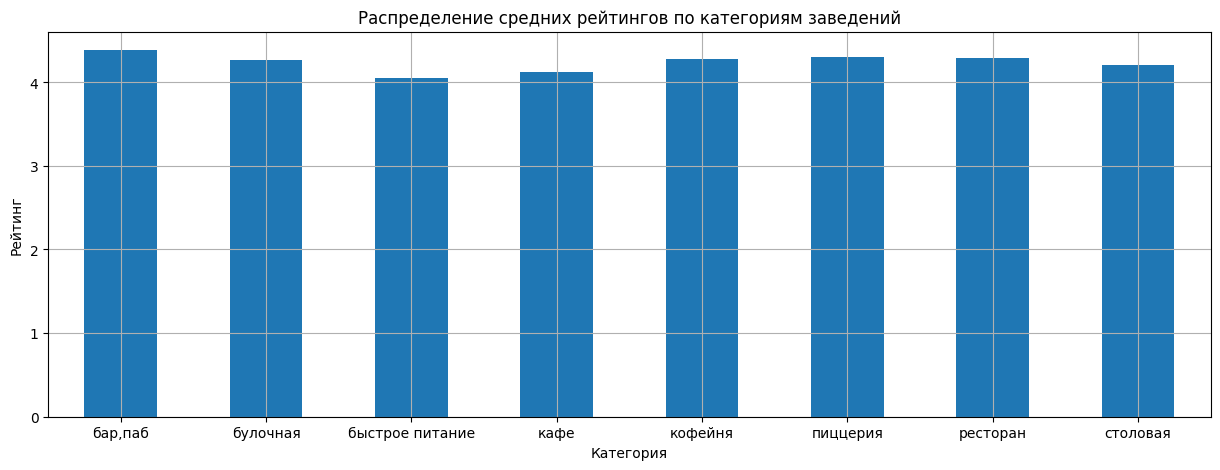

In [53]:
# Построим график столбчатой диаграммы
grouped = df.groupby('category')['rating'].mean()

grouped.plot(kind='bar',
               title=f'Распределение средних рейтингов по категориям заведений',
               ylabel='Рейтинг',
               xlabel='Категория',
               rot=0,
               figsize=(15, 5))
plt.grid()

# Выводим график
plt.show()

Распределение средних рейтингов по категориям заведений является равномерным, все категории имеют прирно одинаковые показатели выше 4.

---

### Задача 6

Изучите, с какими данными показывают самую сильную корреляцию рейтинги заведений? Постройте и визуализируйте матрицу корреляции рейтинга заведения с разными данными: его категория, положение (административный район Москвы), статус сетевого заведения, количество мест, ценовая категория и признак, является ли заведения круглосуточным. Выберите самую сильную связь и проверьте её.

In [54]:
# Вычисляем корреляционную матрицу с использованием phi_k
correlation_matrix = df[['category', 'district', 'chain', 'seats', 'price',
                         'is_24_7', 'rating']].phik_matrix()

# Выводим результат
print('Корреляционная матрица с коэффициентом phi_k для переменной rating')
correlation_matrix.loc[correlation_matrix.index != 'rating'][['rating']].sort_values(by='rating', ascending=False)

interval columns not set, guessing: ['chain', 'seats', 'is_24_7', 'rating']
Корреляционная матрица с коэффициентом phi_k для переменной rating


,rating
price,0.220295
district,0.200760
category,0.189779
is_24_7,0.150315
chain,0.107786
seats,0.000000


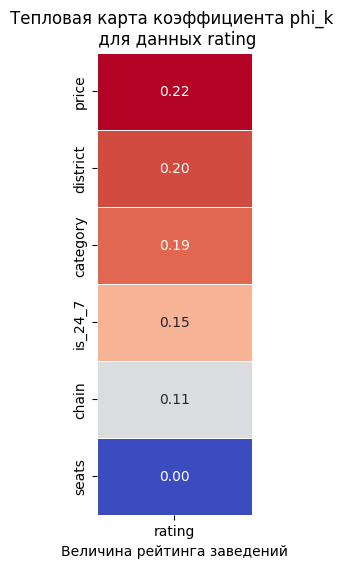

In [55]:
# Строим тепловую карту
plt.figure(figsize=(2, 6))

# Сохраняем матрицу корреляции признака rating с другими признаками клиента
data_heatmap = correlation_matrix.loc[correlation_matrix.index != 'rating'][['rating']].sort_values(by='rating', ascending=False)
sns.heatmap(data_heatmap,
            annot=True, # Отображаем численные значения в ячейках карты
            fmt='.2f', # Форматируем значения корреляции: два знака после точки
            cmap='coolwarm', # Устанавливаем цветовую гамму от красного (макс. значение) к синему
            linewidths=0.5, # Форматируем линию между ячейками карты
            cbar=False # Отключаем цветовую шкалу
           )

# Добавляем заголовок и подпись по оси Х
plt.title('Тепловая карта коэффициента phi_k \n для данных rating')
plt.xlabel('Величина рейтинга заведений')

# Выводим график
plt.show()

Самая сильная связь рейтинга заведений отмечается с ценой. Проверяем связь рейтинга заведения с ценой более подробно. Для каждой ценовой категории посчитаем средние рейтинги.

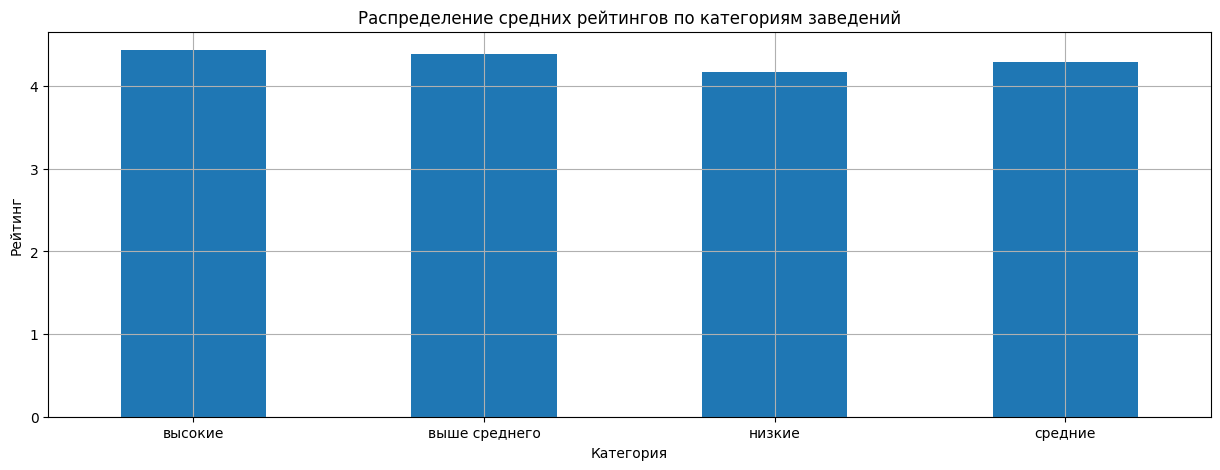

In [56]:
# Построим график столбчатой диаграммы
grouped = df.groupby('price')['rating'].mean()

grouped.plot(kind='bar',
               title=f'Распределение средних рейтингов по категориям заведений',
               ylabel='Рейтинг',
               xlabel='Категория',
               rot=0,
               figsize=(15, 5))
plt.grid()

# Выводим график
plt.show()

Можем отметить что боле выской рейтинг имеют заведения с ценовыми категорями `высокие` и `выше среднего`, затем идут `средние` и `низкие`. Т.е. Значение рейтинга уменьшается с понижением ранга ценовой категории и наоборот, увеличивается с увеличением ранга. Получаем положительную связь между рейтингом и ценой в заведении. 

---

### Задача 7

Сгруппируйте данные по названиям заведений и найдите топ-15 популярных сетей в Москве. Для них посчитайте значения среднего рейтинга. Под популярностью понимается количество заведений этой сети в регионе. К какой категории заведений они относятся? Результат сопроводите подходящими визуализациями.

In [57]:
#Формируем датафрейм с сетевыми заведениями
df_chain = df[df['chain'] == True].copy()
df_chain

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup,is_24_7
4,a163aada139c4c7f87b0b1c0b466a50f,иль марко,пиццерия,"москва, правобережная улица, 1б",Северный АО,"ежедневно, 10:00–22:00",5.0,1,148.0,средние,Средний счёт:400–600 ₽,500.0,NaN,0
13,aea18265b0a0415893f1e796b82568fe,буханка,булочная,"москва, базовская улица, 15, корп. 1",Северный АО,"ежедневно, 08:00–22:00",4.8,1,180.0,NaN,NaN,NaN,NaN,0
19,feec6bedccae44cb877d99c13f9aa5d7,пекарня,булочная,"москва, ижорский проезд, 5",Северный АО,"ежедневно, круглосуточно",4.4,1,NaN,NaN,NaN,NaN,NaN,1
20,1ab5691e4da844d3abadf085e0957852,чебуреки манты,кафе,"москва, правобережная улица, 1б",Северный АО,"ежедневно, 10:00–22:00",4.3,1,148.0,NaN,NaN,NaN,NaN,0
23,78709462f2b3480f825489a5321a3563,буханка,булочная,"москва, лобненская улица, 13к2",Северный АО,"ежедневно, 08:00–22:00",4.7,1,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8317,715f296da82f44bcaf94e26fbeb2202b,беседка,кафе,"москва, кузьминская улица, 10",Юго-Восточный АО,"ежедневно, 11:00–23:00",4.1,1,NaN,NaN,NaN,NaN,NaN,0
8340,cc23f746c1684b1fbe4bdeecced07a5f,семейный очаг,ресторан,"москва, шоссейная улица, 13",Юго-Восточный АО,"ежедневно, 12:00–00:00",4.3,1,98.0,средние,Средний счёт:до 1000 ₽,1000.0,NaN,0
8372,47b4a384611948bcb8e8dedde505ed8e,чайхана sabr,ресторан,"москва, улица хлобыстова, 22",Юго-Восточный АО,"ежедневно, 10:00–00:00",3.9,1,32.0,средние,Средний счёт:150–350 ₽,250.0,NaN,0
8379,aae09f55091e4c1390b61a47267c26e4,лагман хаус,кафе,"москва, новороссийская улица, 14, стр. 2",Юго-Восточный АО,"ежедневно, 10:00–00:00",4.3,1,40.0,NaN,NaN,NaN,NaN,0


In [58]:
#Группируем данные по названиям заведений и считаем их количесво и средний рейтинг 
grouped = df_chain.groupby('name', as_index=False).agg(
    mean_rating=('rating', 'mean'),
    count=('rating', 'count')
)
grouped

,name,mean_rating,count
0,1-я креветочная,3.700000,1
1,10 идеальных пицц,4.300000,3
2,18 грамм,4.466667,3
3,4 сезона,4.700000,1
4,7 сэндвичей,3.975000,4
...,...,...,...
742,яндекс лавка,3.872464,69
743,яндекс.лавка,3.466667,3
744,японская кухня,4.425000,4
745,ё-ланч,4.000000,2


In [59]:
#Присваиваем переменной df_chain_sort отсортированный датафрейм с 15-ю самыми пополярными сетевыми заведениями
df_chain_sort = grouped.sort_values(by='count', ascending=False).head(15)
df_chain_sort

,name,mean_rating,count
729,шоколадница,4.177500,120
335,домино'с пицца,4.169737,76
331,додо пицца,4.286486,74
146,one price coffee,4.064789,71
742,яндекс лавка,3.872464,69
58,cofix,4.075385,65
168,prime,4.116000,50
664,хинкальная,4.322727,44
409,кофепорт,4.147619,42
418,кулинарная лавка братьев караваевых,4.394872,39


In [60]:
# Агрегируем категории в df, оставляя только одно значение категории для каждого заведения
df_unique_categories = df.groupby('name', as_index=False)['category'].first()

# Теперь объединяем df_chain_sort с df_unique_categories
df_chain_sort = df_chain_sort.merge(df_unique_categories[['name', 'category']], on='name', how='left')

df_chain_sort

,name,mean_rating,count,category
0,шоколадница,4.177500,120,кофейня
1,домино'с пицца,4.169737,76,пиццерия
2,додо пицца,4.286486,74,пиццерия
3,one price coffee,4.064789,71,кофейня
4,яндекс лавка,3.872464,69,ресторан
5,cofix,4.075385,65,кофейня
6,prime,4.116000,50,ресторан
7,хинкальная,4.322727,44,быстрое питание
8,кофепорт,4.147619,42,кофейня
9,кулинарная лавка братьев караваевых,4.394872,39,кафе


Проанализируем как распределяются сетевые заведения из топ 15 между категориями заведений.

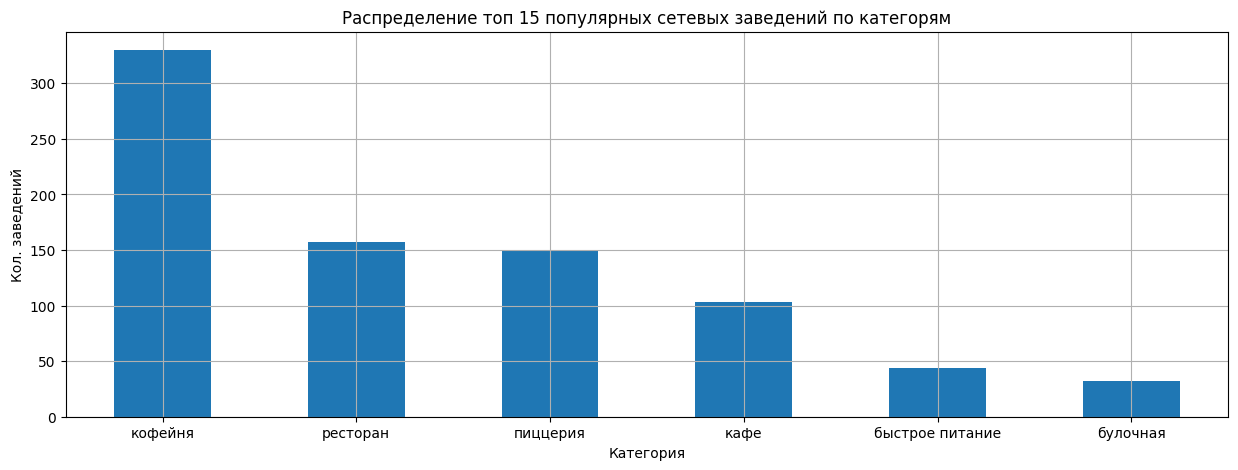

In [61]:
# Построим график столбчатой диаграммы
grouped = df_chain_sort.groupby('category')['count'].sum().sort_values(ascending=False)

grouped.plot(kind='bar',
               title=f'Распределение топ 15 популярных сетевых заведений по категорям',
               ylabel='Кол. заведений',
               xlabel='Категория',
               rot=0,
               figsize=(15, 5))
plt.grid()

# Выводим график
plt.show()

Самой популярной сетью заведений являются заведения с названией `шоколадница` - 120 заведений. Меньше всего заведений из топ-15 у заведения `му-му` 27 точек. Средний рейтинг всех заведений высокий, в среднем 4.

Чаще всего заведения категория `кофейня`, `ресторан`, `пиццерия` являются сетевыми. Меньше всего сетевых заведений в категории `булочная`.

---

### Задача 8

Изучите вариацию среднего чека заведения (столбец `middle_avg_bill`) в зависимости от района Москвы. Проанализируйте цены в Центральном административном округе и других. Как удалённость от центра влияет на цены в заведениях? Результат сопроводите подходящими визуализациями.


Данные по среднему чеку есть для 38% строк. Отфильтруем их в новый датасет, чтобы с ним работать.

In [62]:
#формируем датафрейм, в который помещаем все строки, где в столбце middle_avg_bill есть информация
df_avg_bill = df[df['middle_avg_bill'].notna()].copy()
df_avg_bill

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup,is_24_7
1,045780ada3474c57a2112e505d74b633,четыре комнаты,ресторан,"москва, улица дыбенко, 36, корп. 1",Северный АО,"ежедневно, 10:00–22:00",4.5,0,4.0,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN,0
2,1070b6b59144425896c65889347fcff6,хазри,кафе,"москва, клязьминская улица, 15",Северный АО,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0,средние,Средний счёт:от 1000 ₽,1000.0,NaN,0
4,a163aada139c4c7f87b0b1c0b466a50f,иль марко,пиццерия,"москва, правобережная улица, 1б",Северный АО,"ежедневно, 10:00–22:00",5.0,1,148.0,средние,Средний счёт:400–600 ₽,500.0,NaN,0
6,96ebceb1a09e4e3191133b9fe0379a64,огни города,"бар,паб","москва, клязьминская улица, 9, стр. 3",Северный АО,пн 15:00–04:00; вт-вс 15:00–05:00,4.4,0,45.0,средние,Средний счёт:199 ₽,199.0,NaN,0
7,0243288b78024af090b8e947842c969c,mr. уголёк,быстрое питание,"москва, клязьминская улица, 9, стр. 3",Северный АО,"пн-чт 10:00–22:00; пт,сб 10:00–23:00; вс 10:00...",4.7,0,45.0,средние,Средний счёт:200–300 ₽,250.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8382,c776a19d27f5427596141248adf3aefe,выхинский дворик,кафе,"москва, улица хлобыстова, 22",Юго-Восточный АО,"ежедневно, 11:00–01:00",3.0,0,32.0,средние,Средний счёт:500–1000 ₽,750.0,NaN,0
8383,3abfb264a4a6489e84167880bad5f109,pizza24/7,пиццерия,"москва, улица юных ленинцев, 10/15к1",Юго-Восточный АО,"ежедневно, круглосуточно",4.2,0,NaN,NaN,Средний счёт:150 ₽,150.0,NaN,1
8396,4277890d659341848d7051cbf2e51f51,пекинский двор,ресторан,"москва, ленинский проспект, 158",Западный АО,"ежедневно, 11:00–23:00",4.3,0,200.0,выше среднего,Средний счёт:1000–1500 ₽,1250.0,NaN,0
8399,71cc394927204d45b81c3a91edb47955,"пекарня, кафе-гриль",булочная,"москва, болотниковская улица, 52, корп. 2",Юго-Западный АО,"ежедневно, круглосуточно",4.2,0,50.0,NaN,Средний счёт:50–250 ₽,150.0,NaN,1


In [63]:
# Изучаем статистические показатели столбца middle_avg_bill
df_avg_bill['middle_avg_bill'].describe()

count     3149.000000
mean       958.053668
std       1009.732845
min          0.000000
25%        375.000000
50%        750.000000
75%       1250.000000
max      35000.000000
Name: middle_avg_bill, dtype: float64

Данне распределены не совсем равномерно, в данных наблдается широкий разброс цен. 

In [64]:
# Групируем данные по району и считаем средний чек для каждого из районов
grouped = df_avg_bill.groupby('district')['middle_avg_bill'].mean().sort_values(ascending=False)
grouped

district
Центральный АО         1191.057547
Западный АО            1053.225490
Северный АО             927.959627
Южный АО                834.398089
Северо-Западный АО      822.222930
Восточный АО            820.626923
Юго-Западный АО         792.561702
Северо-Восточный АО     716.611296
Юго-Восточный АО        654.097938
Name: middle_avg_bill, dtype: float64

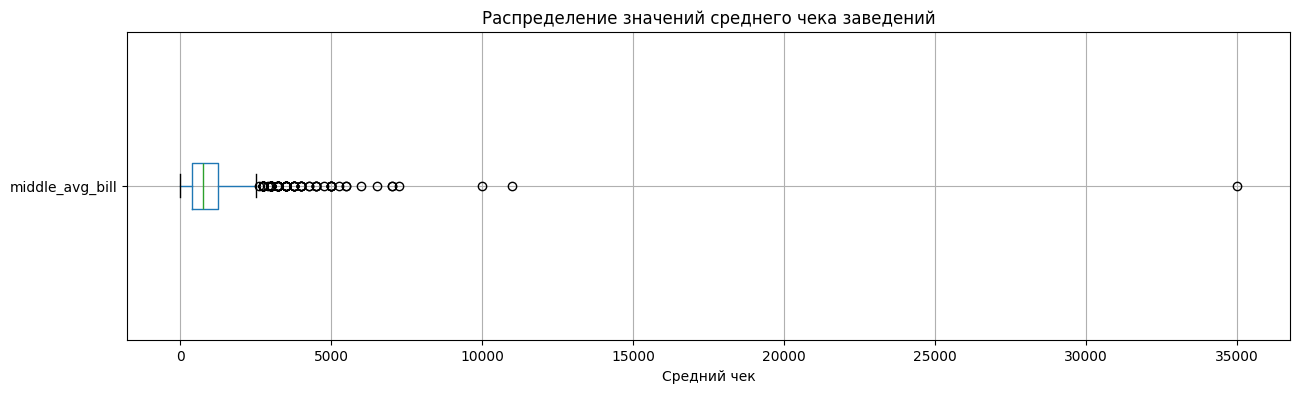

In [65]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(15, 4))

# Строим диаграмму размаха значений в столбце rating
df_avg_bill.boxplot(column='middle_avg_bill', vert=False)

# Добавляем заголовок и метки оси
plt.title('Распределение значений среднего чека заведений')
plt.xlabel('Средний чек')

# Выводим график
plt.show()

Есть некоторое количество выбросов между 3-8 т.р., также один выброс в 35 000. Такие значения среднего чека имеют место быть, так как данные в датасете представлены и за рестораны, которые могут быть дорогими. Также есть заведния с большими банкетными залами. 

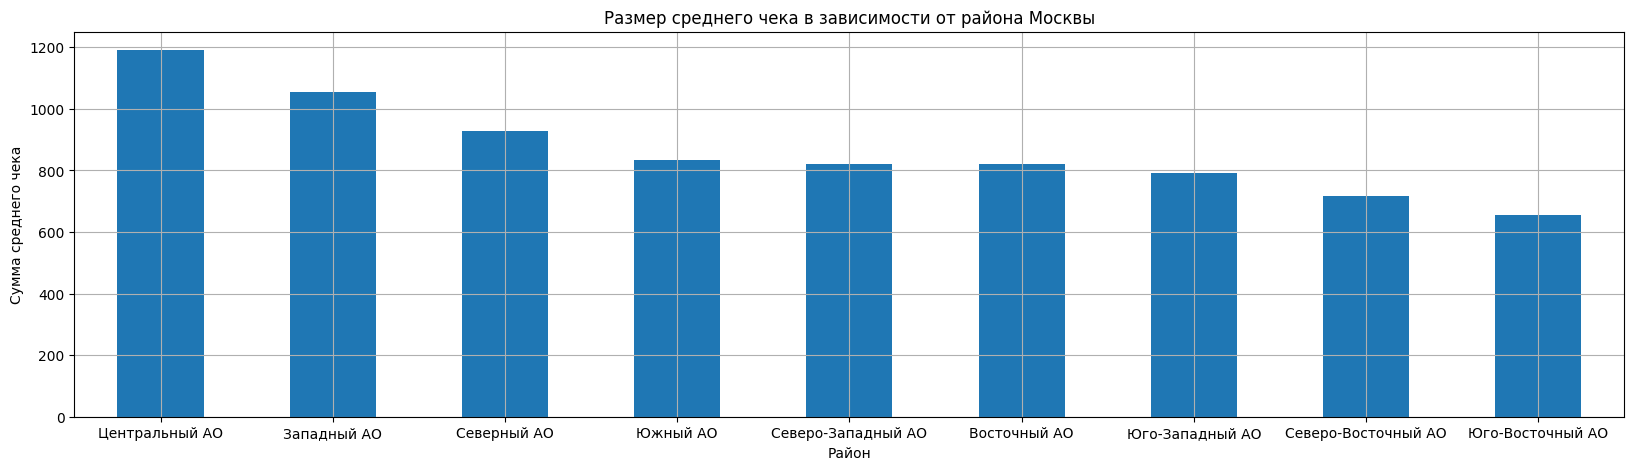

In [66]:
# Построим график столбчатой диаграммы

grouped.plot(kind='bar',
               title=f'Размер среднего чека в зависимости от района Москвы',
               ylabel='Сумма среднего чека',
               xlabel='Район',
               rot=0,
               figsize=(20, 5))
plt.grid()

# Выводим график
plt.show()

Наблюдается закономерность, что чем ближе район находится к центру тем выше средний чек, А самый высокий средний чек в центральном районе - 1191. Это Является логичным, так как цены ближе к центру растут. 

---

### Промежуточный вывод

Обобщите полученные результаты, выделив, по вашему мнению, самые важные.

Проведя исследовательский анализ данных, можно сделать следующие выводы:
- В данных представлены 8 категорий заведений. Больше всего заведений представлено категориями `кафе` - (28%), `ресторан` - (24%), `кофейня` - (16%). Меньше всего заведений в категорях `столовая`(3.7%) и `булочная`(3%). 
- Больше всего заведений находится в `Центральном районе (26%)`, а меньше всего в `Северо-западном раойне (4%)`.
- В центральном районе Москвы преобладают 4 категории заведений: `ресторан`, `кафе`, `кофейня`, `бар,паб`
- 43% заведений являются сетевыми, а 56% несетевыми. Большего всего сетевых заведений среди таких категорий как `кафе`, `кофейня`, `ресторан`. Меньше всего среди `бар,паб`, `столовая`.
- `Ресторан`, `бар/паб` и `кофейня` имеею самы высокий показатель по медиане посадочных мест - 80 мест. 
- Рейтинги всех заведений высокие, практически все рейтинги сконцентрированы между 4.1-4.4 это высокие оценки. Есть несколько единичных рейтингов в диапазоне 1-3.
-  Самая сильная карреляцию связь рейтинга заведений отмечается с ценой - 0,22. Значение рейтинга уменьшается с понижением ранга ценовой категории и наоборот, увеличивается с увеличением ранга. Получаем положительную связь между рейтингом и ценой в заведении. 
- Видим, что самой популярной сетью заведений являются заведения с названией `кафе` - 188 заведений.
- Наиболее популярными категориями среди сетевых заведений являются: `кафе`, `кофейня`, `ресторан`. Меньше всего заведений категории `Пиццерия`.
- Наблюдается закономерность, что чем ближе район находится к центру тем выше средний чек, А самый высокий средний чек в центральном районе - 1191. 

## 4. Детальное исследование пиццерий

Проведите более детальное исследование заведений типа «пиццерия».
Ответьте на следующие вопросы:

---

### Задача 1

Сколько всего пиццерий в датасете? В каких районах их больше всего? Вычислите долю пиццерий в каждом районе от общего количества заведений. Результат сопроводите подходящими визуализациями.

In [67]:
#Содаем отдельный датафрейм только с пиццериями
df_pizza = df[df['category'] == 'пиццерия']
df_pizza.info()

<class 'pandas.core.frame.DataFrame'>
Index: 633 entries, 4 to 8397
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 633 non-null    object 
 1   name               633 non-null    object 
 2   category           633 non-null    object 
 3   address            633 non-null    object 
 4   district           633 non-null    object 
 5   hours              633 non-null    object 
 6   rating             633 non-null    float64
 7   chain              633 non-null    int8   
 8   seats              427 non-null    float64
 9   price              311 non-null    object 
 10  avg_bill           400 non-null    object 
 11  middle_avg_bill    395 non-null    float64
 12  middle_coffee_cup  3 non-null      float64
 13  is_24_7            633 non-null    int64  
dtypes: float64(4), int64(1), int8(1), object(8)
memory usage: 69.9+ KB


Всего 633 пиццерии.

In [68]:
#Подсчитываем количество пиццерий в каждом районе 
grouped_pizza = df_pizza.groupby('district')['name'].count()
grouped_pizza.sort_values(ascending=False)

district
Центральный АО         113
Северный АО             77
Южный АО                73
Восточный АО            72
Западный АО             71
Северо-Восточный АО     68
Юго-Западный АО         64
Юго-Восточный АО        55
Северо-Западный АО      40
Name: name, dtype: int64

Больше всего пиццерий находится в центральном районе - 113. Меньше всего пиццерий находится в северо-западном районе - 40.

Вычисляем долю пиццерий в каждом районе от общего количества заведений в этом районе.

In [69]:
#Подсчитываем количество всех заведений в каждом районе
grouped_all = df.groupby('district')['name'].count()
grouped_all

district
Восточный АО            798
Западный АО             851
Северный АО             898
Северо-Восточный АО     891
Северо-Западный АО      409
Центральный АО         2242
Юго-Восточный АО        714
Юго-Западный АО         709
Южный АО                892
Name: name, dtype: int64

In [70]:
#Подсчитываем процент пиццерий в каждом районе от всего каличества заведений в данном районе 
result = (grouped_pizza / grouped_all) * 100
result.sort_values(ascending=False)

district
Северо-Западный АО     9.779951
Юго-Западный АО        9.026798
Восточный АО           9.022556
Северный АО            8.574610
Западный АО            8.343126
Южный АО               8.183857
Юго-Восточный АО       7.703081
Северо-Восточный АО    7.631874
Центральный АО         5.040143
Name: name, dtype: float64

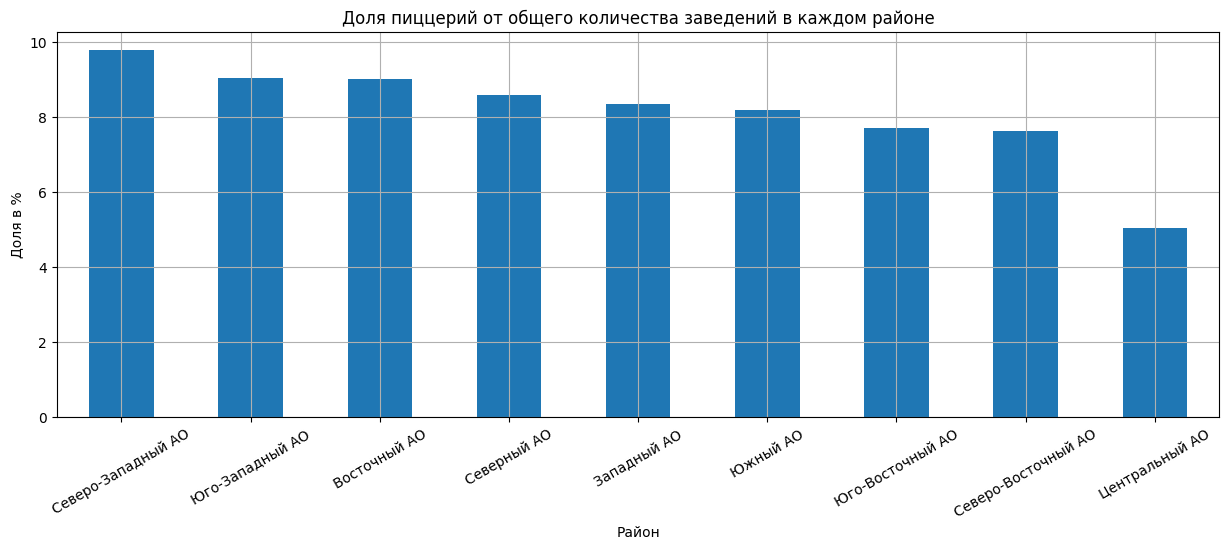

In [71]:
result.sort_values(ascending=False).plot(kind='bar',
               title=f'Доля пиццерий от общего количества заведений в каждом районе',
               ylabel='Доля в %',
               xlabel='Район',
               rot=30,
               figsize=(15, 5))
plt.grid()

# Выводим график
plt.show()

Видим что в центральном районе самая маленькая доля пиццерий от количества всех заведений в районе, состовляет 5%.

---

### Задача 2

Дайте характеристику типовой пиццерии: сколько в ней посадочных мест, какой средний чек или стоимость чашки кофе, какой средний рейтинг? Какая доля сетевых и круглосуточных заведений? Результат сопроводите подходящими визуализациями.

In [72]:
#Подсчитываем основные показатели по столбцу seats
df_pizza['seats'].describe()

count     427.000000
mean       94.496487
std       112.282703
min         0.000000
25%        30.000000
50%        55.000000
75%       120.000000
max      1288.000000
Name: seats, dtype: float64

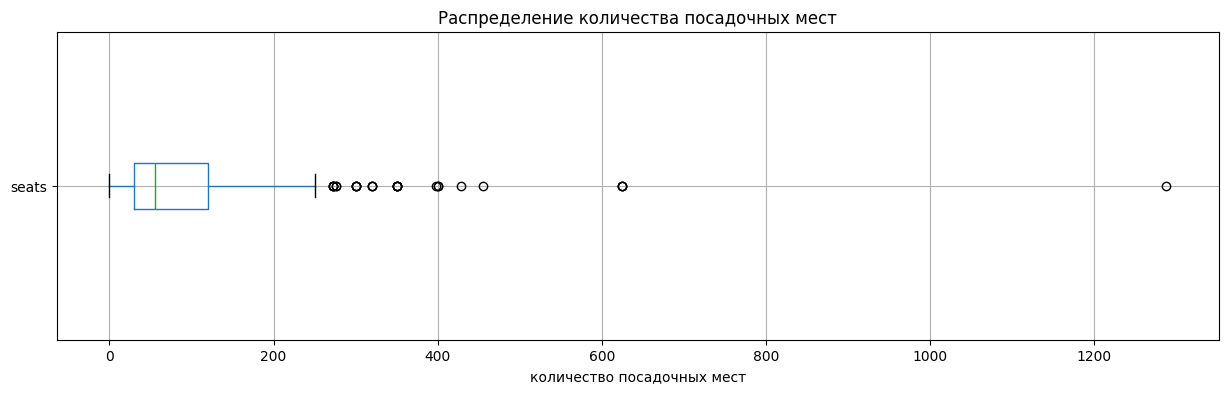

In [73]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(15, 4))

# Строим диаграмму размаха значений в столбце seats
df_pizza.boxplot(column='seats', vert=False)

# Добавляем заголовок и метки оси
plt.title('Распределение количества посадочных мест')
plt.xlabel('количество посадочных мест')

# Выводим график
plt.show()

Количество посадочных мест распределяется неравномерно. Видим большое стандартное отклонение, также большую разнице между средним и медианным значениями. Завышеное среднее значание может обьясняться некоторыми выбросами в данных 650 и 1288 посадочных мест. Выбросы начинаются с 250. В целом в пиццериях от 30 до 120 посадочных мест.

In [74]:
df_pizza['middle_avg_bill'].describe()

count     395.000000
mean      789.377215
std       518.310744
min       150.000000
25%       424.000000
50%       600.000000
75%      1000.000000
max      3000.000000
Name: middle_avg_bill, dtype: float64

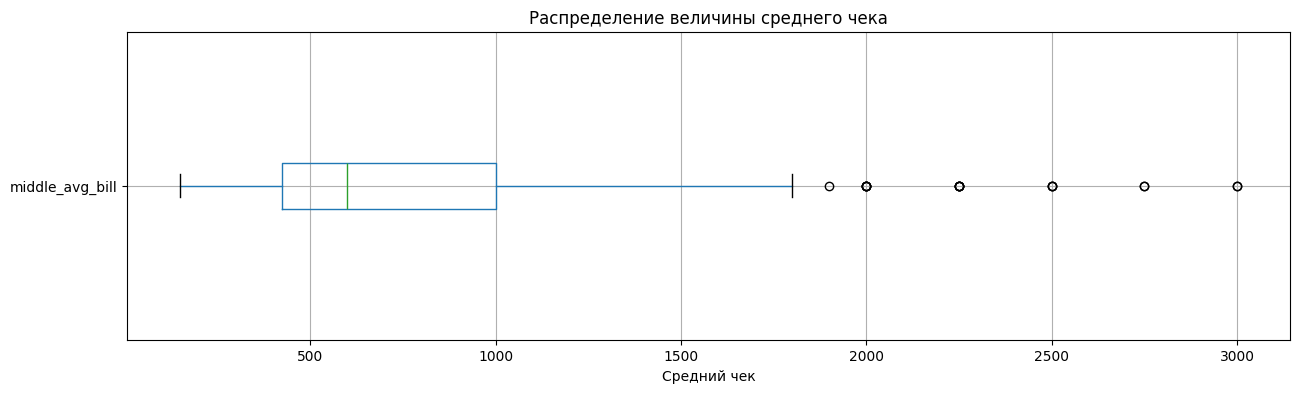

In [75]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(15, 4))

# Строим диаграмму размаха значений в столбце seats
df_pizza.boxplot(column='middle_avg_bill', vert=False)

# Добавляем заголовок и метки оси
plt.title('Распределение величины среднего чека')
plt.xlabel('Средний чек')

# Выводим график
plt.show()

Данные распределены не совсем равномерно. Выбросы начинаются с 1800 р.. Большое стандартное отклонение. Значение среднего чека и медианнного немного отличается. Средний чек равен 790. 

In [76]:
df_pizza['rating'].describe()

count    633.000000
mean       4.301264
std        0.336162
min        1.000000
25%        4.200000
50%        4.300000
75%        4.400000
max        5.000000
Name: rating, dtype: float64

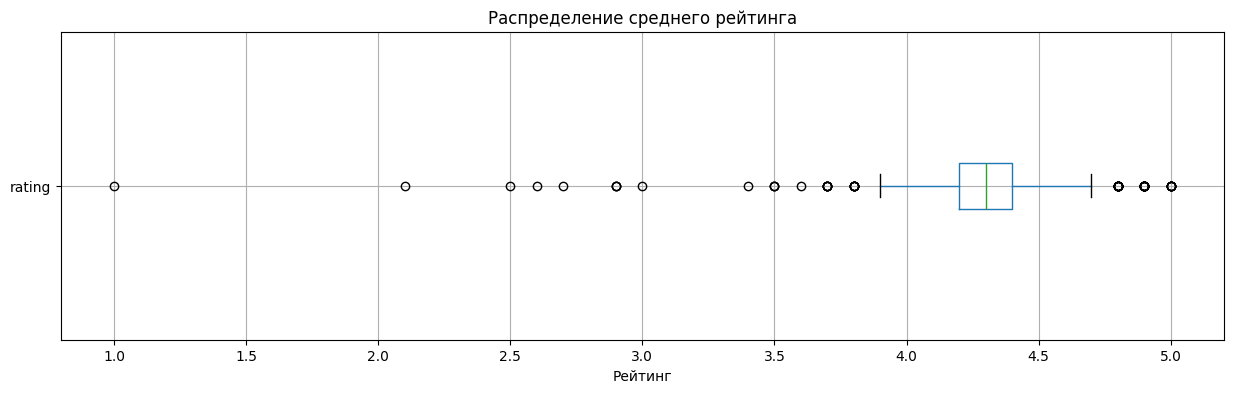

In [77]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(15, 4))

# Строим диаграмму размаха значений в столбце seats
df_pizza.boxplot(column='rating', vert=False)

# Добавляем заголовок и метки оси
plt.title('Распределение среднего рейтинга')
plt.xlabel('Рейтинг')

# Выводим график
plt.show()

Значения рейтинга распределены равномерно. Средний рейтинг 4.3 .

In [78]:
df_pizza['middle_coffee_cup'].describe()

count      3.000000
mean     153.333333
std        5.773503
min      150.000000
25%      150.000000
50%      150.000000
75%      155.000000
max      160.000000
Name: middle_coffee_cup, dtype: float64

Видим, что по столбцу `middle_coffee_cup` всего 3 значения. Это слишком маленькое количество данных для какого-либо анализа. Однако, можно предположить, что кофе не является популярной позицией в пиццериях.

Данные распределены равномерно. В среднем чашка кофе стоит 153.

In [79]:
#Подсчитаваем количество сетевых и несетевых пиццерий
df_pizza["chain"].value_counts()

chain
1    330
0    303
Name: count, dtype: int64

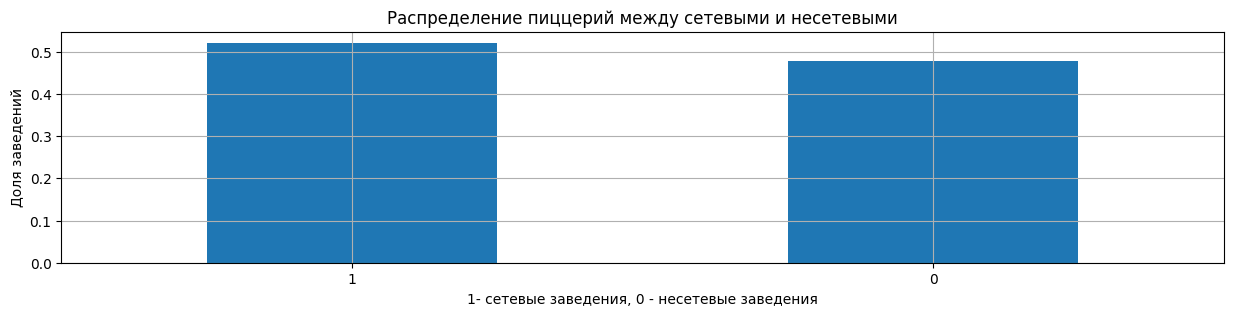

In [80]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(15, 3))

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
df_pizza["chain"].value_counts(normalize=True).plot(
               kind='bar', # Тип графика - столбчатая диаграмма
               rot=0, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Распределение пиццерий между сетевыми и несетевыми'
)

# Настраиваем оформление графика
plt.xlabel('1- сетевые заведения, 0 - несетевые заведения')
plt.ylabel('Доля заведений')

# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

Количество сетевых пиццерий  всего на 27 заведений больше чем несетевых.

In [81]:
#Подсчитаваем количество круглосуточных и некруглосуточных пиццерий
df_pizza["is_24_7"].value_counts()

is_24_7
0    602
1     31
Name: count, dtype: int64

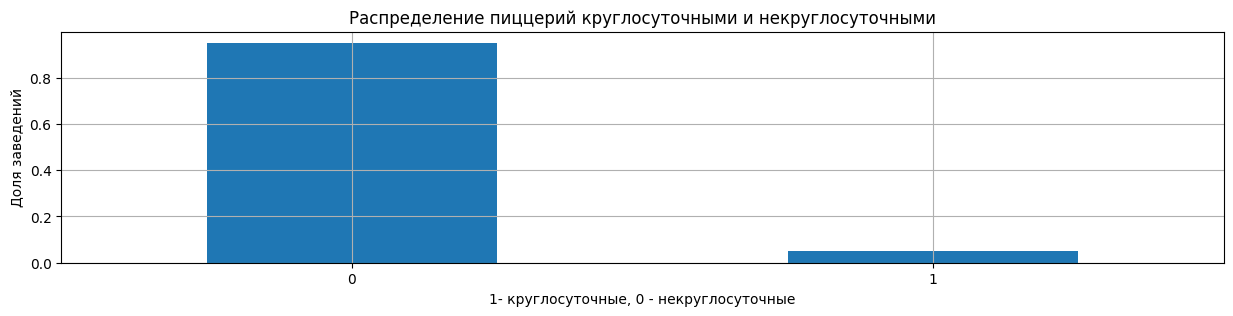

In [82]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(15, 3))

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
df_pizza["is_24_7"].value_counts(normalize=True).plot(
               kind='bar', # Тип графика - столбчатая диаграмма
               rot=0, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Распределение пиццерий круглосуточными и некруглосуточными'
)

# Настраиваем оформление графика
plt.xlabel('1- круглосуточные, 0 - некруглосуточные')
plt.ylabel('Доля заведений')

# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

Больше 90% пиццерий являются некруглосуточными. 

---

### Задача 3

Изучите распределение сетевых и несетевых пиццерий в зависимости от округа Москвы. В каких округах меньше всего сетевых пиццерий? Результат сопроводите подходящими визуализациями.

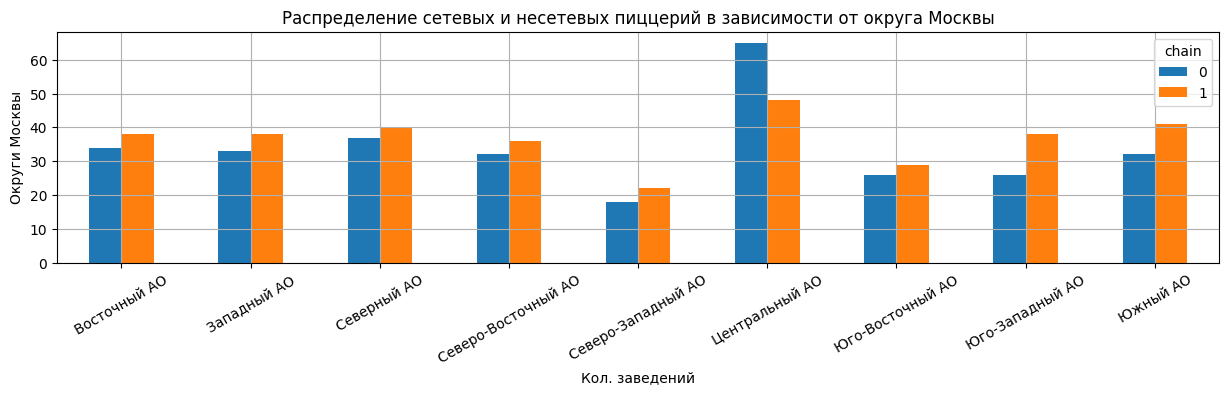

In [83]:
# Построим график столбчатой диаграммы
grouped = df_pizza.groupby('district')['chain'].value_counts().unstack()
grouped.plot(kind='bar',
               title=f'Распределение сетевых и несетевых пиццерий в зависимости от округа Москвы',
               legend=True,
               ylabel='Округи Москвы',
               xlabel='Кол. заведений',
               rot=30,
               figsize=(15, 3))
plt.grid()

# Выводим график
plt.show()

Видим, что в каждом районе количество сетевых пиццерий первышает количество несетевых. Только в центральном районе количество несетевых заведений немного выше количества сетевых.

Теперь подсчитаем долю сетевых пиццерий в каждом районе от общего количества пиццерий в соответствующем районе.

In [84]:
#Подсчитываем количество все пиццерий в каждом районе 
grouped_pizza = df_pizza.groupby('district')['name'].count().sort_values(ascending=False)
grouped_pizza

district
Центральный АО         113
Северный АО             77
Южный АО                73
Восточный АО            72
Западный АО             71
Северо-Восточный АО     68
Юго-Западный АО         64
Юго-Восточный АО        55
Северо-Западный АО      40
Name: name, dtype: int64

In [85]:
#Подсчитываем количество сетевых пиццерий в каждом районе 
df_pizza_chain = df_pizza[df_pizza['chain'] == True].copy()
grouped_pizza_chain = df_pizza_chain.groupby('district')['name'].count().sort_values(ascending=False)
grouped_pizza_chain

district
Центральный АО         48
Южный АО               41
Северный АО            40
Восточный АО           38
Западный АО            38
Юго-Западный АО        38
Северо-Восточный АО    36
Юго-Восточный АО       29
Северо-Западный АО     22
Name: name, dtype: int64

In [86]:
#Подсчитываем процент сетевых пиццерий в каждом районе от всего каличества пиццерий в данном районе 
result = (grouped_pizza_chain / grouped_pizza) * 100
result.sort_values(ascending=False)

district
Юго-Западный АО        59.375000
Южный АО               56.164384
Северо-Западный АО     55.000000
Западный АО            53.521127
Северо-Восточный АО    52.941176
Восточный АО           52.777778
Юго-Восточный АО       52.727273
Северный АО            51.948052
Центральный АО         42.477876
Name: name, dtype: float64

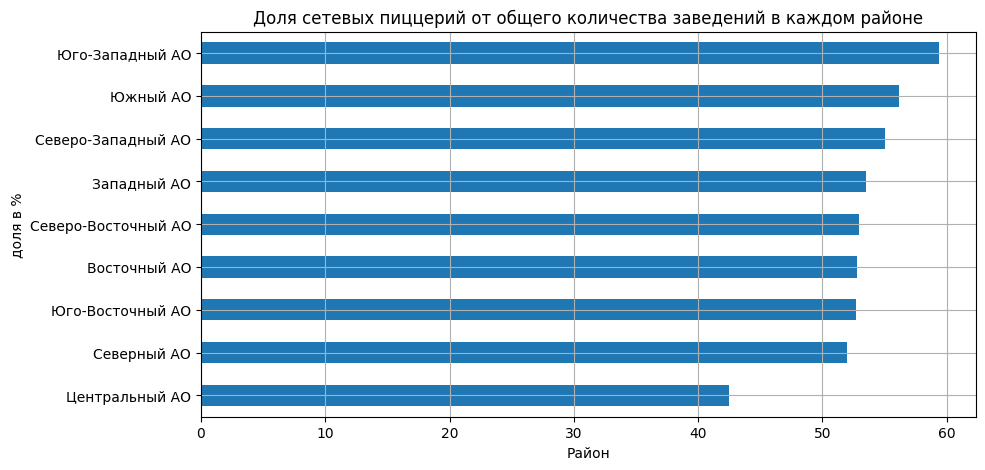

In [87]:
result.sort_values(ascending=True).plot(kind='barh',
               title=f'Доля сетевых пиццерий от общего количества заведений в каждом районе',
               ylabel='доля в %',
               xlabel='Район',
               rot=0,
               figsize=(10, 5))
plt.grid()

# Выводим график
plt.show()

В целом значения распределены равномерно, доля сетевых в каждом районе составляет от 50% до 60%. Самая маленькая доля сетевых пиццерий находится в центральном районе это 42%. Пичиной может быть то, что в центре чаще открываются более уникальные заведения. 

---

### Промежуточный вывод

Попробуйте дать рекомендацию для открытия нового заведения. Это творческое задание: здесь нет правильного или неправильного ответа, но ваше решение должно быть чем-то обосновано. Например, можно сделать акцент на районах или улицах. Или дать характеристику типичной пиццерии.

Характесристика типичной пиццерии:
- Количество посадочных мест от 30 до 120.
- В центральном районе самая маленькая доля пиццерий от количества всех заведений в районе, состовляет 5%. Самая большая доля в `Северо-Западный АО`, `Юго-Западный АО`, `Восточный АО` по 9% в каждом.
- в пиццериях от 30 до 120 посадочных мест.
- Средний чек равен 790 р. 
- Средний рейтинг 4.3 .
- В среднем чашка кофе стоит 153 р.
- Количество сетевых пиццерий немного больше чем несетевых, рахница примерно в 10%.
- Больше 90% пиццерий являются некруглосуточными. 
- В центральном районе количество несетевых заведений немного выше количества несетевых. Востальных районах количество сетевых пиццерий превышает количество несетевых.

## 5. Итоговый вывод и рекомендации

По результатам проведённого исследовательского анализа данных сформулируйте итоговый вывод и рекомендации для заказчика. Старайтесь акцентировать внимание на ключевых моментах исследования.

При составлении вывода придерживайтесь такой структуры:

1. Общий обзор проделанной работы.
2. Ответы на исследовательские вопросы, или главные выводы.
3. Рекомендации на основе анализа данных.

**Общий обзор проделанной работы**

В ходе изучения рынка общественнного питаные, были проанализированы данные 8 406 заведений общественного питания в Москве. В ходе изучения была проделана следующая работа:
- Выполненна предобработка данных.
- Проведен исследовательский анализ данных все предмтавленных заведений.
- Провели детальное исследование пиццерий.

**Ответы на исследовательские вопросы, или главные выводы**
- В данных представлены 8 категорий заведений. Больше всего заведений представлено категориями `кафе` - (28%), `ресторан` - (24%), `кофейня` - (16%). Меньше всего заведений в категорях `столовая`(3.7%) и `булочная`(3%). 
- Больше всего заведений находится в `Центральном районе (26%)`, а меньше всего в `Северо-западном раойне (4%)`.
- В центральном районе Москвы преобладают 4 категории заведений: `ресторан`, `кафе`, `кофейня`, `бар,паб`
- 62% заведений являются сетевыми, а 48% несетевыми. Видим, что большего всего сетевых заведений среди таких категорий как `кафе`, `ресторан`, `кофейня`. Меньше всего среди `бар,паб`, `булочная`, `столовая`.
- `Ресторан`, `бар/паб` и `кофейня` имеею самы высокий показатель по медиане посадочных мест - 80 мест. 
- Рейтинги всех заведений высокие, практически все рейтинги сконцентрированы между 4.1-4.4 это высокие оценки. Есть несколько единичных рейтингов в диапазоне 1-3.
-  Самая сильная карреляцию связь рейтинга заведений отмечается с ценой - 0,22. Значение рейтинга уменьшается с понижением ранга ценовой категории и наоборот, увеличивается с увеличением ранга. Получаем положительную связь между рейтингом и ценой в заведении. 
- Самой популярной сетью заведений являются заведения с названией `шоколадница` - 120 заведений. Меньше всего заведений из топ-15 у заведения `му-му` 27 точек. Средний рейтинг всех заведений высокий, в среднем 4.
- Чаще всего заведения категория `кофейня`, `ресторан`, `пиццерия` являются сетевыми. Меньше всего сетевых заведений в категории `булочная`.
- Наиболее популярными категориями среди сетевых заведений являются: `кафе`, `кофейня`, `ресторан`. Меньше всего заведений категории `Пиццерия`.
- Наблюдается закономерность, что чем ближе район находится к центру тем выше средний чек, соответственно самый высокий средний чек в центральном районе - 1191.



**Рекомендации на основе анализа данных**

- Формат заведения: Можно рассмотреть открытие кафе или ресторана, так как эти категории наиболее популярны. Также можно рассмотреть и пиццерии, они рассчитаны на более широкую аудиторию. 
- Местоположение: Центральный район: подходит для более дорогих заведений (высокий чек, сетевые заведения). В районах более отдаленных от цента конкуренция будет меньше, а спрос на заведения пиццерии и кафе тоже высокий. 
- Сетевое или несетевое заведение: Открытие сетевого заведения может дать стабильность, особенно в категориях кафе, кофейни или ресторана. Для более уникальных концепций можно выбрать несетевое заведение.
